In [210]:
import math
import numpy as np
import pandas as pd
from scipy.linalg import pinv
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [211]:
# Reading dataset
data1 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ML/Data2.csv")
data1.insert(0, "x0", 1) # adding one more dimension with values 1
try:
  data1.drop(columns=["Sl."], inplace=True)
except:
  None

# Renaming columns to y
cols = data1.columns.to_list()
if 'y' not in cols:
  col_map = {cols[-1]: 'y'}
  data1.rename(columns=col_map, inplace=True)

dimension = len(data1.columns)-1
dimension

2

In [212]:
data1

,x0,x,y
0,1,0.1,5.764952e+01
1,1,0.2,4.740870e+01
2,1,0.3,6.946902e+01
3,1,0.4,3.755086e+01
4,1,0.5,7.860685e+01
...,...,...,...
95,1,9.6,3.636073e+05
96,1,9.7,8.819300e+05
97,1,9.8,1.053557e+06
98,1,9.9,4.503040e+05


In [213]:
def getVector(idx):
  """Returns a vector for the provided index"""
  return np.array((data1.iloc[idx][:dimension],))

In [214]:
y_values = list(data1['y'])

In [215]:
sum_xi_xiT = np.zeros((dimension, dimension))
for i in range(len(data1)):
  sum_xi_xiT += (getVector(i)) * (getVector(i).T)

inverse_sum = pinv(sum_xi_xiT)
inverse_sum

array([[ 0.04060606, -0.00606061],
       [-0.00606061,  0.00120012]])

In [216]:
sum_xi_yi = np.array(([0.0]*dimension,))
for i in range(len(data1)):
  sum_xi_yi += (getVector(i)) * (y_values[i])

sum_xi_yi = sum_xi_yi.T
sum_xi_yi

array([[ 8453004.94642936],
       [77353900.97809686]])

In [217]:
w = inverse_sum @ sum_xi_yi
w

array([[-125568.28992134],
       [  41603.63156151]])

Prediction:
y^ = W<sup>T</sup>X

In [218]:
predicted_yi = []
for i in range(len(data1)):
  predicted_yi.append(w.T @ getVector(i).T)
# predicted_yi

In [219]:
meanOfy = data1['y'].mean()
meanOfy

84530.04946429358

In [220]:
# Calculating Residual Sum of Squares (RSS)
RSS = 0
for i in range(len(data1)):
  RSS += math.pow((y_values[i] - predicted_yi[i]), 2)
RSS

2757778585316.4067

In [221]:
# Calculating Total Sum of Squares (TSS)
TSS = 0
for i in range(len(data1)):
  TSS += math.pow((y_values[i] - meanOfy), 2)
TSS

4200019479391.407

Calculating:
> R<sup>2</sup> = 1 - (RSS/TSS)

In [222]:
rSquare = 1-(RSS/TSS)
rSquare

0.34338909644390136

In [223]:
# Calculating Mean Absolute Error (MAE)
MAE = 0
for i in range(len(data1)):
  MAE += abs(y_values[i] - predicted_yi[i])
MAE = MAE[0][0]

## My model:

In [224]:
print("Normalized MSE: ", RSS/len(data1))
print("Normalized MAE: ", MAE/len(data1))
print("Normalized RMSE: ", math.pow(RSS/len(data1), 0.5))
print("R Square: ", rSquare)

Normalized MSE:  27577785853.164066
Normalized MAE:  99929.78329714174
Normalized RMSE:  166065.60707492707
R Square:  0.34338909644390136


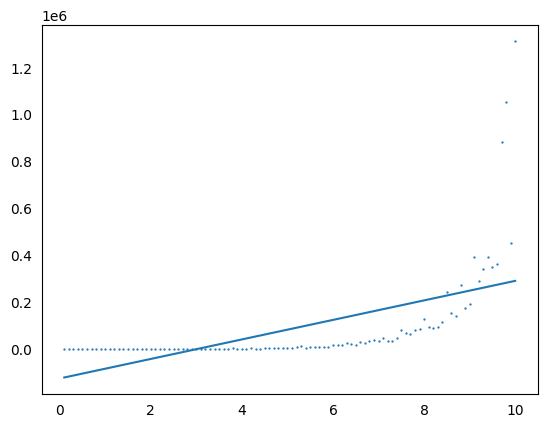

In [225]:
try:
  # For linear
  pre_yi = np.array(predicted_yi).reshape(100,1)   # reshaping predicted yi to nx1

  plt.scatter(list(data1['x']), list(data1['y']), s=0.4)
  plt.plot(list(data1['x']), pre_yi)
  plt.tick_params(left = False, bottom = False)
  plt.show()
except:
  print("Cannot plot for multi-dimensional dataset")
  None # for multi-dimensional

Calculating Errors from sklearn package

In [226]:
mae = mean_absolute_error(y_true=y_values,y_pred=pre_yi)
mse = mean_squared_error(y_true=y_values,y_pred=pre_yi)
rmse = mean_squared_error(y_true=y_values,y_pred=pre_yi,squared=False)
r_square = r2_score(y_values, pre_yi)

print("MSE:",mse)
print("MAE:",mae)
print("RMSE:",rmse)
print("R2: ", r_square)

MSE: 27577785853.164074
MAE: 99929.78329714174
RMSE: 166065.6070749271
R2:  0.34338909644390125


MAE: 71670.39156710415
MSE: 20387175828.89852
RMSE: 142783.66793474148
R2: 0.5145933029850454


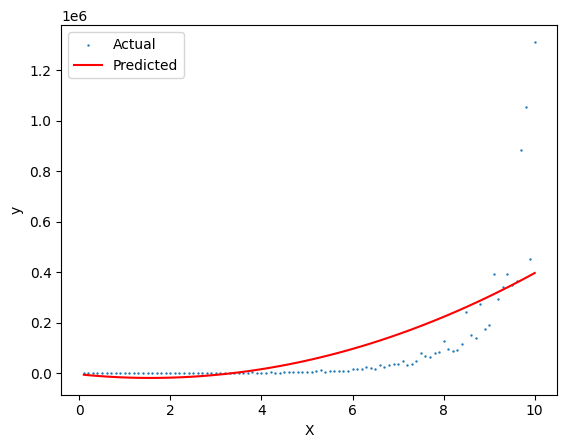

In [227]:
def polynomial_regression_gradient_descent(X, y, degree, learning_rate=0.01, iterations=1000, tol=1e-5):
    X_poly = np.c_[np.ones((len(X), 1)), X]
    for d in range(2, degree + 1):
        X_poly = np.c_[X_poly, X_poly[:, 1]**d]

    theta = np.random.randn(degree + 1, 1)

    m = len(y)
    prev_cost = float('inf')
    for iteration in range(iterations):
        predictions = X_poly.dot(theta)
        errors = predictions - y.reshape(-1, 1)

        gradients = 2/m * X_poly.T.dot(errors)

        theta -= learning_rate * gradients

        cost = np.mean(errors**2)

        if abs(prev_cost - cost) < tol:
            break

        prev_cost = cost

    return theta

def predict(X, theta):
    return X.dot(theta)

X = np.array(data1['x'])
y_values = np.array(data1['y'])
theta = polynomial_regression_gradient_descent(X, y_values, dimension, learning_rate=0.0001)

X_poly = np.c_[np.ones((len(X), 1)), X]
for d in range(2, dimension + 1):
    X_poly = np.c_[X_poly, X_poly[:, 1]**d]

y_pred = predict(X_poly, theta)


mae = mean_absolute_error(y_values, y_pred)
mse = mean_squared_error(y_values, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_values, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R2: {r2}')

plt.scatter(list(data1['x']), y_values, label='Actual', s=0.5)
plt.plot(list(data1['x']), y_pred, color='red', label='Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()